Beschrijving van de dataset

Deze dataset is kunstmatig gecreëerd en richt zich op het voorspellen van landbouwoogsten. Het simuleert omstandigheden op basis van diverse milieu- en managementfactoren. Het doel is het bieden van een oefenomgeving voor het ontwikkelen van voorspellende modellen in de context van landbouw, machine learning en regressieanalyse.

Importeren van data

Hier importeren we de data uit het csv in een dataframe met behulp van pandas. 
Ook visualiseren we de eerste paar rows om de structuur te kunnen bekijken.

In [2]:
import pandas as pd

ay_data = pd.read_csv("../csv/agricultural_yield_train.csv")
ay_data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,96.415657,1,147.853040,94.593926,444.267569,3,683.759119
1,92.352626,0,281.565396,90.504644,517.585491,7,678.714861
2,63.714785,1,137.864940,97.329340,420.310945,8,934.691975
3,90.084256,1,100.946659,113.404828,547.817646,7,905.842541
4,81.600341,1,223.088908,83.048176,434.726333,6,897.584665


Definiëren van de X & Y variables

Hier definiëren we de x en y variables, 

De x array bestaat uit alle onafhankelijke features, deze wordt vormgegeven door de y feature te droppen.
De y array bestaat uit alle afhankelijke features, deze wordt vormgegeven door alleen de y feature te pakken.

We definiëren deze arrays om ons mlp model te kunnen fitten met de juiste data, het is namelijk de bedoeling dat we aan de hand van de x variablen, de y variabel kunnen voorspellen.

Ook worden de 2 arrays gevisualiseerd om de waardes te kunnen bekijken.



In [4]:
x = ay_data.drop(["Yield_kg_per_hectare"], axis= 1).values
y = ay_data["Yield_kg_per_hectare"].values

x, y

(array([[ 96.4156574 ,   1.        , 147.85304019,  94.59392594,
         444.26756885,   3.        ],
        [ 92.35262586,   0.        , 281.56539608,  90.5046436 ,
         517.58549117,   7.        ],
        [ 63.71478519,   1.        , 137.86493988,  97.32934017,
         420.3109448 ,   8.        ],
        ...,
        [ 67.47848719,   1.        , 120.01712248, 102.30862733,
         514.3727475 ,   8.        ],
        [ 85.17689046,   1.        , 247.84738886, 114.95663392,
         695.03580096,   6.        ],
        [ 87.8382803 ,   0.        , 244.21653603,  98.31373807,
         590.79491539,   6.        ]]),
 array([683.75911882, 678.71486056, 934.69197491, ..., 932.82956077,
        889.7384376 , 554.69838897]))

Definiëren van de train en test sets

De train sets worden gebruikt om de model te trainen, de test sets worden gebruikt om de afhankelijke y feature te voorspellen.
Ook geven we mee wat de split tussen de data is, in dit geval hebben we gekozen voor een 80-20 split. Dus 80% wordt gebruikt voor het trainen van het model en 20% wordt gebruikt voor het testen.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0, stratify=y)

Trainen van de model

Hier wordt het linear regression model getraind met de hiervoor gedefiniëerde train data.

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Voorspellen van y feature

Hier wordt de y feature voorspelt aan de hand van de test data

In [13]:
y_pred = model.predict(x_test)
y_pred

array([ 915.2899966 ,  328.81073164, 1069.58466433, ...,  782.9942971 ,
        866.03615426,  631.22885787])

Score

Hier wordt de r2 score gevisualiseerd. Deze score geeft inzicht in hoe goe dhet model presteert, de score voor dit model is 94%

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9387186561041541

Visualisatie actual vs predicted

Hier worden de echte y features vergeleken met de voorspelde values. zoals je kan zien is er een sterke regressie.

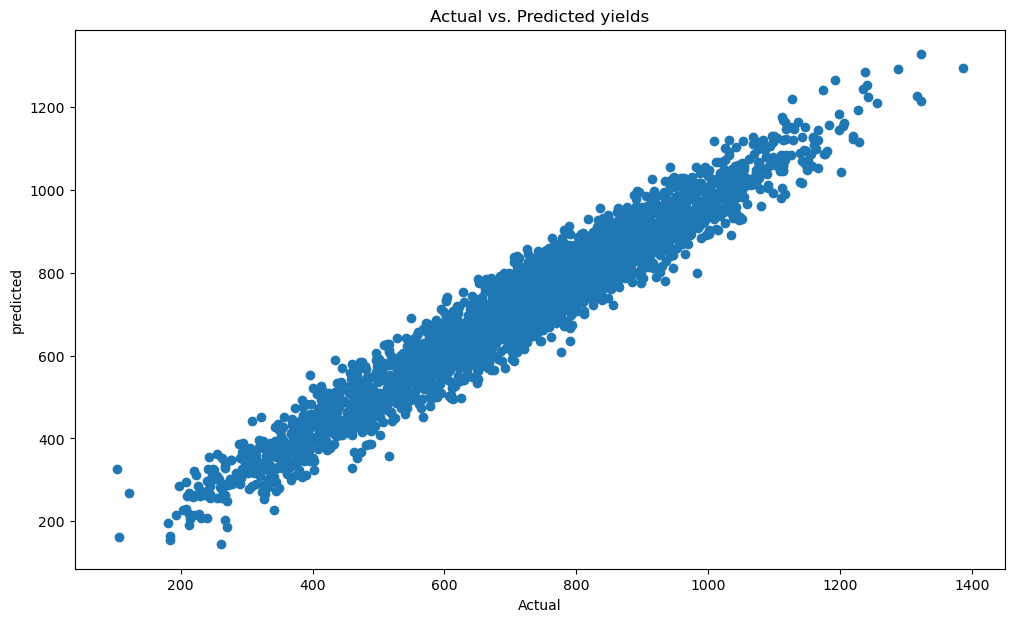

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("Actual vs. Predicted yields")
plt.show()

Hier wordt het verschil weergegeven tussen de echte en voorspelde values

In [12]:
pred_y_df = pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred, "Difference": y_test - y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,986.864132,915.289997,71.574136
1,341.164777,328.810732,12.354045
2,1141.712913,1069.584664,72.128249
3,730.570319,671.712591,58.857728
4,911.094215,922.696145,-11.601930
5,487.082233,436.541027,50.541206
6,352.995758,328.263251,24.732507
7,952.557766,897.161222,55.396544
8,894.420219,800.324197,94.096022
9,556.065179,557.650538,-1.585359


Coefficents

De coefficents zijn de waardes die aangeven hoe sterk de invloed van een onafhankelijke feature is op de afhankelijke feature.
Hier zie je dat seed variety en irrigation schedule een zeer grote invloed hebben op de uitkomst.

In [34]:
coefficients = model.coef_
feature_names = ['Soil_Quality', 'Seed_Variety', 'Fertilizer_Amount_kg_per_hectare', 'Sunny_Days', 'Rainfall_mm', 'Irrigation_Schedule']
coef_df = pd.DataFrame({"Features": feature_names, "coefficient": coefficients})
coef_df

,Features,coefficient
0,Soil_Quality,1.523437
1,Seed_Variety,300.254517
2,Fertilizer_Amount_kg_per_hectare,0.807751
3,Sunny_Days,1.983242
4,Rainfall_mm,-0.506587
5,Irrigation_Schedule,49.881321


Deze coefficents kunnen we gebruiken om het model minder complex te maken door features met weinig invloed weg te laten, zolang de accuracy gelijk blijft of verbetert wordt.


Na de scores te bekijken en het model meerdere keren opnieuw te trainen en te testen kan ik concluderen dat het weglaten van features een slechtere accuracy oplevert.

Het 2e beste is het weglaten van soil quality of sunny days. Dit maakt het model wat minder complex maar behaal je hier maar een score van 93% mee, terwijl het gebruik van alle features een resultaat geeft van 94%. 